# Week 5 練習と総合問題解答

In [1]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

####  <練習問題 5-1>

本編で利用した自動車価格データを利用します。
このデータに対して、目的変数を`price`とし、説明変数に`length`と`engine-size`を使って重回帰のモデル構築をしてみましょう。このとき`train_test_split`を使って訓練データとテストデータが半分になるように分けてモデルを構築し、テストデータを使って、モデルのスコアを求めてください。`train_test_split`を実行する際には、`random_state`オプションを0に設定してください。

In [2]:
# 自動車価格データの取得
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.columns =['symboling', 'normalized-losses', 'make', 'fuel-type' , 'aspiration', 'num-of-doors',
                            'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
                            'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
                            'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [3]:
# 解答
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# データの前処理
auto = auto[['price', 'length', 'engine-size']]
auto = auto.replace('?', np.nan).dropna()
auto.shape

# 学習用/検証用にデータを分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築・評価
model = LinearRegression()
model.fit(X_train, y_train)
print('決定係数(train):{:.3f}'.format(model.score(X_train, y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test, y_test)))

決定係数(train):0.771
決定係数(test):0.763


####  <練習問題 5-2>

<練習問題 5-1>のデータに対して、目的変数は同じ`price`で、今度は、別の説明変数を使って、同じように重回帰のモデリングをしてみましょう。異なる説明変数を使うことで、モデルの結果がどのように変わったでしょうか。その原因を考察してみましょう。

＜解答方針＞

解説コードの箇所で

`auto[['price', 'horsepower', 'width', 'height']]`

で変数がセットされており、`horsepower`や`width`、`height`を別の変数にセットして実行してくみてください。

####  <練習問題 5-3>
`sklearn.datasets`モジュールの`load_breast_cancer`関数を使って乳がんデータを読み込んで、目的変数を`cancer.target`として、`cancer.data`を説明変数にロジスティック回帰で予測モデルを構築してください。この時、訓練データとテストデータに分ける`train_test_split（random_state=0）`を使って、テストデータにおけるスコアを求めてください。

In [4]:
# 解答
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.958
正解率(test):0.923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


####  <練習問題 5-4>
<練習問題 5-3>と同じ設定で、同じデータに対して、特徴量を標準化してからモデル構築してみてください。その上で、上記の結果と比較してください。

In [5]:
# 解答
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.991
正解率(test):0.958


####  <練習問題 5-5>

<練習問題 5-1>で用いたデータに対してラッソ回帰を評価してください。`sklearn_linear`モジュールの`Lasso`クラスを使います。なお、`Lasso`クラスにはパラメータ設定し、変更できるので調べてみてください。具体的には以下の公式ドキュメントをみてください。

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [6]:
# 解答
from sklearn.linear_model import LinearRegression, Lasso

X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

models = {
    'linear': LinearRegression(),
    'lasso1':  Lasso(alpha=1.0, random_state=0),
    'lasso2':  Lasso(alpha=200.0, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
lasso1,0.763417,0.770736
lasso2,0.763993,0.770730
linear,0.763419,0.770736


####  <練習問題 5-6>
`sklearn.datasets`モジュールの`load_breast_cancer`関数から乳がんデータを読み込み、目的変数をcancer.target、説明変数をcancer.dataとして、決定木のモデルを構築し、訓練スコアと検証スコアを確認してください。また木の深さなどのパラメータを変更して、その結果を比較してみてください。

In [7]:
# 解答
from sklearn.tree import  DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


####  <練習問題 5-7>
5.5「決定木」で扱ったキノコのデータに対してk-NNを使ってモデリングして検証してみましょう。`k`パラメータを変更しながら実行してください。

In [8]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mush = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mush.columns = [
    'classes', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'bruises',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
    'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
    'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
    'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat'
]

mush_dummy = pd.get_dummies(mush[['gill_color', 'gill_attachment', 'odor', 'cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x == 'p' else 0)

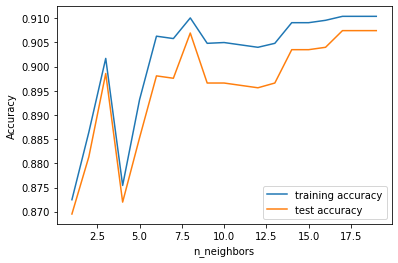

In [9]:
# 解答
from sklearn.neighbors import  KNeighborsClassifier

# 説明変数と目的変数
X = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

####  <練習問題 5-8>
4章で使った学生のテスト結果のデータ（student-mat.csv）を用いて、目的変数を`G3`、説明変数を以下で定義する`X`（学生の属性データを使用）として、k-NNの`k`パラメータを変えながら、どの`k`が最適か考えてみましょう。

目的変数は数値型での回帰となるので、`KNeighborsRegressor`を使ってください。回帰の場合、出力される値は近傍の`k`個のデータの平均になります。

In [10]:
# インポート
import requests, zipfile
import os

# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

# データをurlから取得
r = requests.get(url, stream=True)

# zipfile内のstudent-mat.csvをカレントディレクトリ内のdataディレクトリに展開
with zipfile.ZipFile(io.BytesIO(r.content)) as existing_zip:
    existing_zip.extract('student-mat.csv', 'data')

# csvfileが存在するディレクトリ
data_dir = './data'

# student-mat.csvのpathを取得
path = os.path.join(data_dir, 'student-mat.csv')

student = pd.read_csv(path, sep=';')
X = student.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime'
                              , 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc'
                              , 'absences', 'G1', 'G2']].values

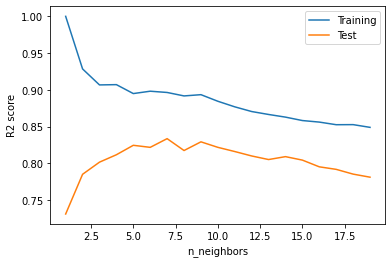

In [11]:
# 解答
from sklearn.neighbors import  KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, student.G3, random_state=0)

scores_train = []
scores_test = []
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))
    
plt.plot(neighbors_settings, scores_train, label='Training')
plt.plot(neighbors_settings, scores_test, label='Test')
plt.ylabel('R2 score')
plt.xlabel('n_neighbors')
plt.legend()

####  <練習問題 5-9>

乳がんデータセットについて、`sklearn.svm`モジュールの`SVC`クラスを使って、`cancer.target`を予測するモデルを構築しましょう。モデルの構築では、`model = SVC(kernel='rbf', random_state=0, C=2)`としてみてください。モデルを構築したら、学習データとテストデータに分けて標準化し、スコアを確認してください。

In [12]:
# 解答
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state=0, C=2)
model.fit(X_train_std, y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.988
正解率(test):0.986


## 5.8 総合問題

### ■ 総合問題5-1 教師あり学習の用語（1）
解答略

### ■ 総合問題5-2 決定木
`sklearn.datasets`モジュールの`load_iris`関数を使ってアヤメの花のデータセットを読み込み、目的変数を`iris.target`、説明変数を`iris.data`として、決定木のモデルを使って予測と検証を実施してください。

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.964
正解率(test):0.947


### ■ 総合問題5-3 ノーフリーランチ

これまで数学の成績データや乳がんデータなど、さまざまなデータを扱ってきました。これらのデータに対して、ロジスティック回帰分析やSVMなど今まで学んだモデルを試し、どれが一番スコアが高いかを確認しましょう。データによって、一番良いスコアが出るモデルは異なりますが、その特徴はどんなものか、考察してください。これをノーフリーランチといい、どんなデータに対しても、一番良いモデルになるモデルはないということを意味します。

In [14]:
# 解答
# 必要なライブラリの読み込み
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

# ここでは例としてload_breast_cancerで読み込んだ乳がんデータを用いる
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 複数のモデルの設定
models = {
    'knn':  KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(random_state=0),
    'logistic': LogisticRegression(random_state=0),
    'svc1': LinearSVC(random_state=0),
    'svc2': SVC(random_state=0)
}

# スコアをもつための空の辞書データ
scores = {}

# それぞれのモデルごとにスコアを算出
for model_name, model in models.items():
    model.fit(X_train_std, y_train)
    scores[(model_name, 'train')] = model.score(X_train_std, y_train)
    scores[(model_name, 'test')] = model.score(X_test_std, y_test)

# 最後にそれぞれのスコア結果を表示
pd.Series(scores).unstack()

,test,train
knn,0.951049,0.978873
logistic,0.958042,0.990610
svc1,0.951049,0.992958
svc2,0.958042,0.992958
tree,0.902098,1.000000


**謝辞**：以下3つのデータセットの利用に関して
1. http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
2. http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
3. https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

引用元：Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [[http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)]. Irvine, CA: University of California, School of Information and Computer Science.

- 3のデータセットの引用について追記：  
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp.5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[http://www3.dsi.uminho.pt/pcortez/student.pdf](http://www3.dsi.uminho.pt/pcortez/student.pdf)  